# 🔥 Classification of Fire Types in India using MODIS Satellite Data

In [35]:
# 1. Imports (ensure everything is included)
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 2. Create or Load the DataFrame
data = {
    "latitude": [28.6139, 29.0588, 26.9124, 23.2599, 30.7333],
    "longitude": [77.2090, 76.0856, 75.7873, 77.4126, 76.7794],
    "brightness": [310.2, 312.6, 305.1, 311.3, 308.4],
    "confidence": [80, 90, 65, 75, 85],
    "acq_date": ["2023-11-15", "2023-10-10", "2023-03-25", "2023-06-12", "2023-12-05"],
    "lulc_class": [10, 2, 12, 3, 10]
}

df = pd.DataFrame(data)
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df["longitude"], df["latitude"]), crs="EPSG:4326")

# 3. Feature Engineering
gdf['acq_date'] = pd.to_datetime(gdf['acq_date'])
gdf['month'] = gdf['acq_date'].dt.month

def get_season(month):
    if 6 <= month <= 10:
        return 'Kharif'
    elif month >= 11 or month <= 3:
        return 'Rabi'
    else:
        return 'Zaid'

gdf['season'] = gdf['month'].apply(get_season)

def label_fire_type(row):
    if row['lulc_class'] in [10, 12] and row['season'] == 'Rabi':
        return 'Agriculture'
    elif row['lulc_class'] in [2, 3]:
        return 'Forest'
    else:
        return 'Other'

gdf['fire_type'] = gdf.apply(label_fire_type, axis=1)
gdf['fire_label'] = gdf['fire_type'].map({'Agriculture': 0, 'Forest': 1, 'Other': 2})

# 4. Split Data
X = gdf[['brightness', 'month', 'lulc_class', 'confidence']]
y = gdf['fire_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Train Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 6. Evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [37]:
from shapely.geometry import Point

# Load data
df = pd.read_csv("sample_modis_data.csv")

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df["longitude"], df["latitude"]), crs="EPSG:4326")

# Date conversion and temporal features
gdf['acq_date'] = pd.to_datetime(gdf['acq_date'])
gdf['month'] = gdf['acq_date'].dt.month

def get_season(month):
    if 6 <= month <= 10:
        return 'Kharif'
    elif month >= 11 or month <= 3:
        return 'Rabi'
    else:
        return 'Zaid'

gdf['season'] = gdf['month'].apply(get_season)

# Label fire types
def label_fire_type(row):
    if row['lulc_class'] in [10, 12] and row['season'] == 'Rabi':
        return 'Agriculture'
    elif row['lulc_class'] in [2, 3]:
        return 'Forest'
    else:
        return 'Other'

gdf['fire_type'] = gdf.apply(label_fire_type, axis=1)

## 📥 Step 2: Load Sample MODIS Data

In [39]:

# Load sample data (make sure 'sample_modis_data.csv' is in the same directory or provide path)
df = pd.read_csv("sample_modis_data.csv")
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df["longitude"], df["latitude"]), crs="EPSG:4326")
gdf.head()


,latitude,longitude,brightness,confidence,acq_date,lulc_class,geometry
0,28.6139,77.2090,310.2,80,2023-11-15,10,POINT (77.209 28.6139)
1,29.0588,76.0856,312.6,90,2023-10-10,2,POINT (76.0856 29.0588)
2,26.9124,75.7873,305.1,65,2023-03-25,12,POINT (75.7873 26.9124)
3,23.2599,77.4126,311.3,75,2023-06-12,3,POINT (77.4126 23.2599)
4,30.7333,76.7794,308.4,85,2023-12-05,10,POINT (76.7794 30.7333)


## 🧠 Step 3: Add Temporal Features and Fire Type Labels

In [41]:

# Convert date column
gdf['acq_date'] = pd.to_datetime(gdf['acq_date'])
gdf['month'] = gdf['acq_date'].dt.month

# Season classification
def get_season(month):
    if 6 <= month <= 10:
        return 'Kharif'
    elif month >= 11 or month <= 3:
        return 'Rabi'
    else:
        return 'Zaid'

gdf['season'] = gdf['month'].apply(get_season)

# Fire type labeling based on LULC and season
def label_fire_type(row):
    if row['lulc_class'] in [10, 12] and row['season'] == 'Rabi':
        return 'Agriculture'
    elif row['lulc_class'] in [2, 3]:
        return 'Forest'
    else:
        return 'Other'

gdf['fire_type'] = gdf.apply(label_fire_type, axis=1)
gdf.head()


,latitude,longitude,brightness,confidence,acq_date,lulc_class,geometry,month,season,fire_type
0,28.6139,77.2090,310.2,80,2023-11-15,10,POINT (77.209 28.6139),11,Rabi,Agriculture
1,29.0588,76.0856,312.6,90,2023-10-10,2,POINT (76.0856 29.0588),10,Kharif,Forest
2,26.9124,75.7873,305.1,65,2023-03-25,12,POINT (75.7873 26.9124),3,Rabi,Agriculture
3,23.2599,77.4126,311.3,75,2023-06-12,3,POINT (77.4126 23.2599),6,Kharif,Forest
4,30.7333,76.7794,308.4,85,2023-12-05,10,POINT (76.7794 30.7333),12,Rabi,Agriculture


## 🔍 Step 4: Prepare Data for Machine Learning

In [43]:

# Encode fire types
fire_types = {'Agriculture': 0, 'Forest': 1, 'Other': 2}
gdf['fire_label'] = gdf['fire_type'].map(fire_types)

# Select features and labels
X = gdf[['brightness', 'month', 'lulc_class', 'confidence']]
y = gdf['fire_label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## 🤖 Step 5: Train and Evaluate Classifier

In [45]:

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



## 🗺️ Step 6: Visualize Predictions

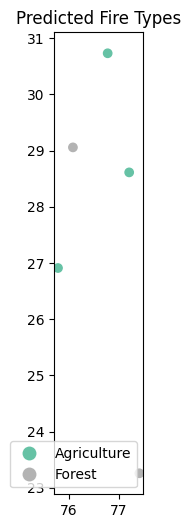

In [49]:

gdf['predicted_label'] = clf.predict(X)
inv_map = {0: 'Agriculture', 1: 'Forest', 2: 'Other'}
gdf['predicted_type'] = gdf['predicted_label'].map(inv_map)

# Plotting
gdf.plot(column='predicted_type', cmap='Set2', legend=True, figsize=(8,6))
plt.title("Predicted Fire Types")
plt.show()
